In [92]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
pd.set_option('display.max_columns', None)

In [93]:
csv_file = '/home/sergei/data/change_org_comments_petition_slug_hollywood-boycott-aquaman-2-amber-heard_at_20211005-210520_limit_1000_offset_0_delay_ms_100.csv'

In [94]:
df = pd.read_csv(csv_file)

In [95]:
# removing static petition data
for col in df.columns:
    if col.startswith('commentable_entity'):
        del df[col]

In [96]:
# removing columns with ==1 entry
col_unique_vals = {col: len(set(df[col])) for col in df.columns}
for col, vals in col_unique_vals.items():
    if vals <= 1:
        print("dropping", col)
        del df[col]

dropping parent_id
dropping commentable_type
dropping commentable_id
dropping user__roles


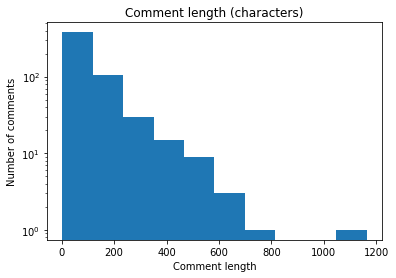

In [97]:
plt.figure()
plt.title("Comment length (characters)")
plt.hist(df.comment.map(len))
plt.xlabel("Comment length")
plt.yscale('log')
plt.ylabel("Number of comments")
plt.show()

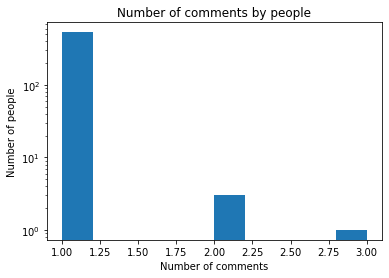

In [98]:
df['count'] = 1
plt.title("Number of comments by people")
plt.xlabel("Number of comments")
plt.ylabel("Number of people")
plt.yscale('log')
plt.hist(df.groupby('user__id')['count'].sum())
plt.show()

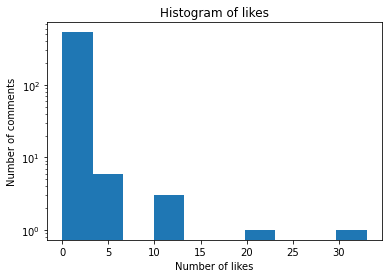

In [99]:
plt.hist(df.likes)
plt.title('Histogram of likes')
plt.xlabel('Number of likes')
plt.ylabel('Number of comments')
plt.yscale('log')
plt.show()

In [100]:
df['created_at'] = pd.to_datetime(df.created_at)

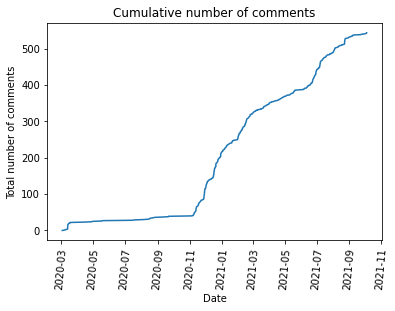

In [101]:
plt.title("Cumulative number of comments")
plt.xlabel("Date")
plt.ylabel("Total number of comments")
plt.plot(df.created_at, list(range(len(df)))[::-1])
plt.xticks(rotation=85)
plt.savefig('figures/comments_count.png', bbox_inches='tight', transparent=False)
plt.show()

In [102]:
df.columns

Index(['id', 'comment', 'children_count', 'likes', 'role', 'created_at',
       'deleted_at', 'user__id', 'user__slug', 'user__first_name',
       'user__last_name', 'user__short_display_name', 'user__display_name',
       'user__city', 'user__state_code', 'user__country_code', 'user__website',
       'user__locale', 'user__description', 'user__photo__id',
       'user__photo__url', 'user__photo__sizes__small__url',
       'user__photo__sizes__small__processing',
       'user__photo__sizes__small__size__width',
       'user__photo__sizes__small__size__height',
       'user__photo__sizes__medium__url',
       'user__photo__sizes__medium__processing',
       'user__photo__sizes__medium__size__width',
       'user__photo__sizes__medium__size__height',
       'user__photo__sizes__large__url',
       'user__photo__sizes__large__processing',
       'user__photo__sizes__large__size__width',
       'user__photo__sizes__large__size__height',
       'user__photo__sizes__xlarge__url',
       'use

In [103]:
set(df.user__website)

{'https://www.twitter.com/Aleshliska',
 'https://www.twitter.com/Amirhossssein',
 'https://www.twitter.com/Christina L Kennedy',
 'https://www.twitter.com/CristaLea11',
 'https://www.twitter.com/Dagmar Soto',
 'https://www.twitter.com/Dawn Marie Curry',
 'https://www.twitter.com/Jenny Gurin',
 'https://www.twitter.com/Karen L Oliver',
 'https://www.twitter.com/Madambeb',
 'https://www.twitter.com/Nicole Marshall',
 'https://www.twitter.com/Sheryll Yang',
 'https://www.twitter.com/Stephan76215148',
 'https://www.twitter.com/lolita_ruckert',
 'https://www.twitter.com/small_and_wise',
 'https://www.twitter.com/stormiestl',
 nan}

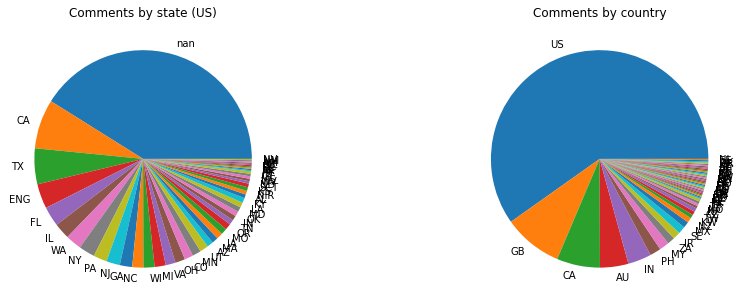

In [104]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Comments by state (US)")
states, freqs = zip(*Counter(df.user__state_code).most_common())
plt.pie(freqs, labels=states)

plt.subplot(1, 2, 2)
plt.title("Comments by country")
states, freqs = zip(*Counter(df.user__country_code).most_common())
plt.pie(freqs, labels=states)

plt.savefig('./figures/comments-state-country-pie.png', transparent=False,
            bbox_inches='tight')

plt.show()